## Predicting Diabetes Using Perceptron Algorithm

#### Md Tauhidul Islam
` University of Adelaide`
` Adelaide SA 5005`
` a1895813@adelaide.edu.au`

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
# Checking the data details
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Checing any duplicate data
diabetes_df.duplicated().sum()

0

In [5]:
# Checking the missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

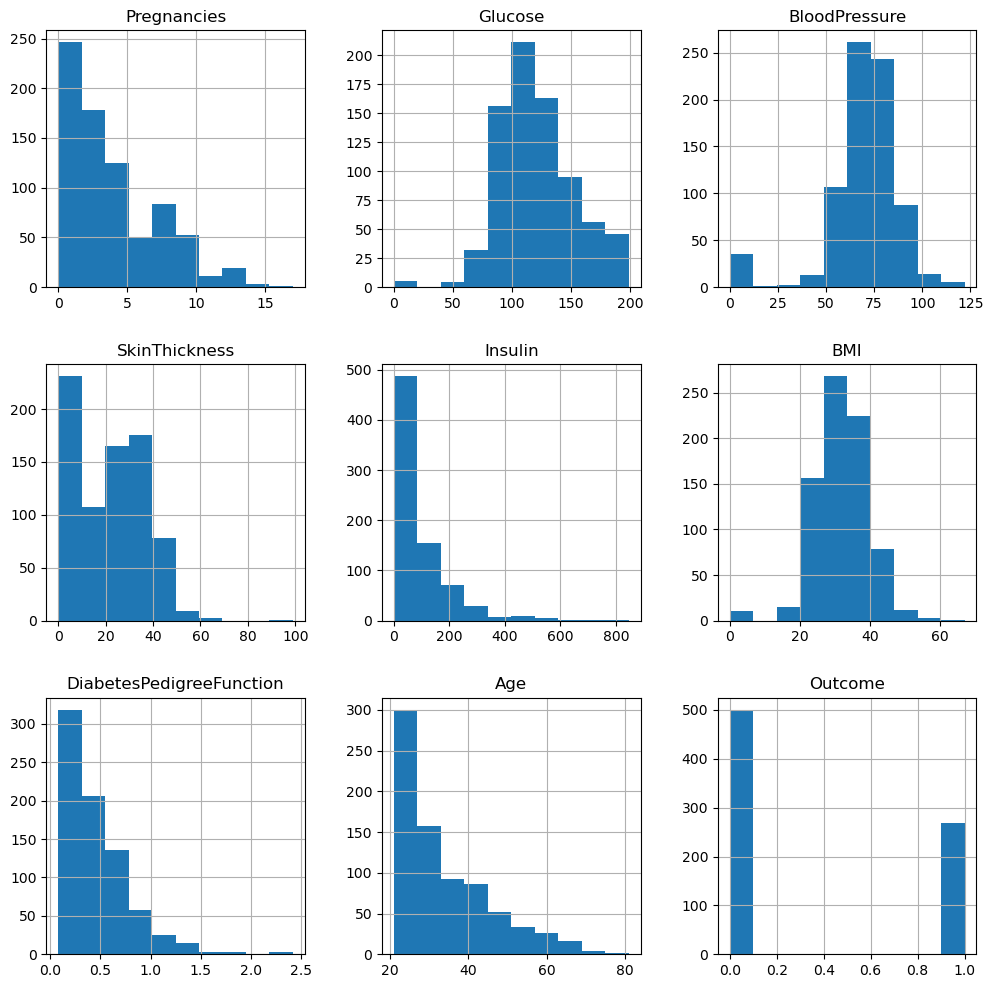

In [6]:
# Checking the distribution of the data
diabetes_df.hist(figsize = (12,12))
plt.show()

We have seen that some variable has 0 values among which Glucose, BloodPressure, SkinThickness, Insulin, 
BMI Cannot not be zero in a normal case. Therefore, we'll be replacing these 0 to NaN.

In [7]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
## showing the count of Nans
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We can see that there are two many NaN values which we cannot remove or we'll loose a signification data. We will rather replace the NaN values based on statistical analysis.

In [9]:
# Obtaining statistical summary
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Per the distribution we have seen above we will replace the NaN values with mean for `Glucose`, `BloodPressure` and `BMI` due to roughly normal distribution and with median for `SkinThickness` and `Insulin` for skewed distribution.

Reference: https://medium.com/@chandrikasai9997/imputing-missing-values-is-another-technique-used-to-handle-missing-data-in-a-dataset-824957ce71b4

In [10]:
diabetes_df['Glucose'] = diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean()) 
diabetes_df['BloodPressure']=diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean()) 
diabetes_df['SkinThickness']=diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median()) 
diabetes_df['Insulin']=diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median()) 
diabetes_df['BMI']=diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean()) 

# Reference: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns

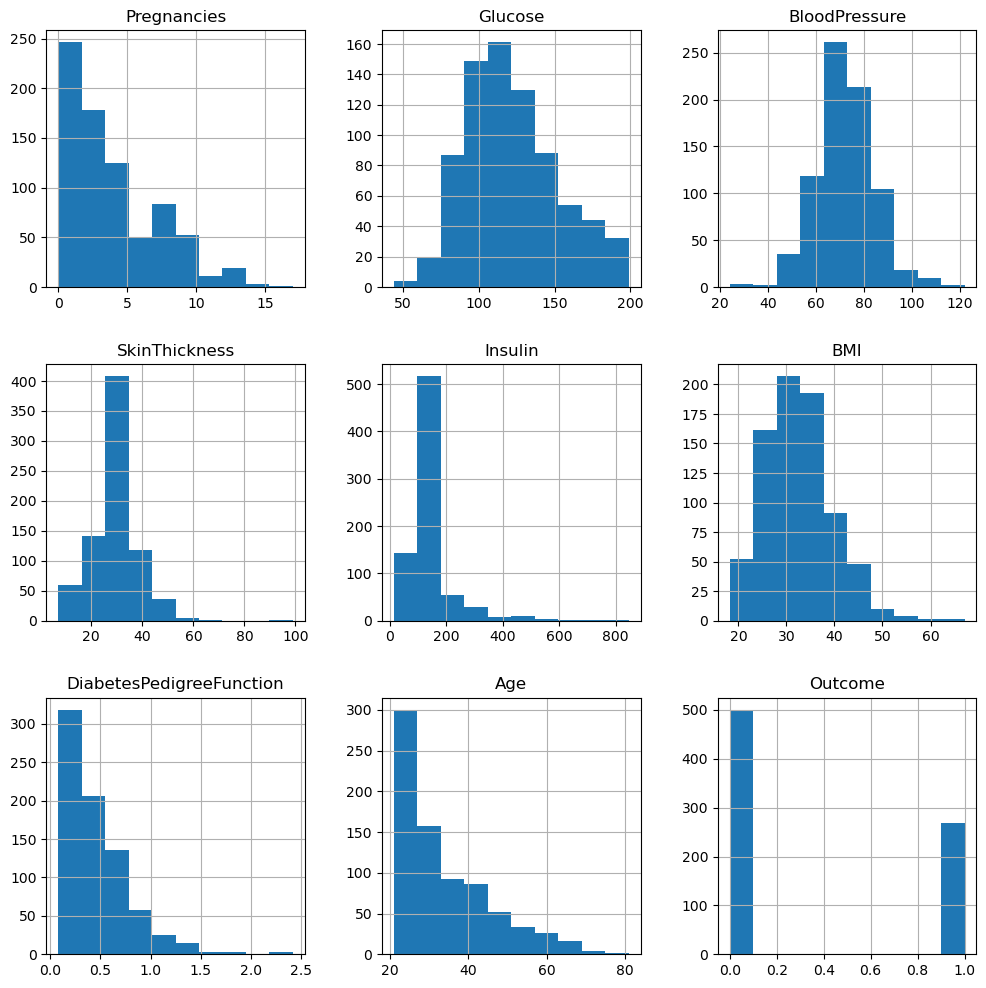

In [11]:
# Reviewing the distribution of the data
diabetes_df.hist(figsize = (12,12))
plt.show()

In [12]:
## Again verifying the NaN values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
y = diabetes_df['Outcome'] # Our target variable
X = diabetes_df.drop(['Outcome'], axis = 1) # Features

In [14]:
# Train-Test Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42, stratify = y)

In [15]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [16]:
class Perceptron():
    def __init__(self, num_features, lr):
        self.num_features = num_features
        self.weights = np.zeros((num_features)) # initialising to 0 (A vector of size num_features)
        self.bias = np.zeros(1) # initialising to 0
        self.lr = 1 # Setting learning rate to 1
        
    def predict(self, input_vector):
        net_input = np.dot(input_vector, self.weights) + self.bias
        # This is just weighted sum of (W·X + b) 
        
        binary_threshold = np.where(net_input > 0., 1, 0)
        # if net input is > 0 ouput is 1 otherwise zero
        
        return binary_threshold
    
    def compute_error(self, X, y):  
        y_pred = self.predict(X)
        errors = y - y_pred # Actual - predicted
        return errors
        
    def fit(self, x, y, epochs): 
        for epoch in range(epochs): # Looping through the number of epochs
            
            for i in range(y.shape[0]): # Looping through each training sample
                errors = self.compute_error(x[i], y[i]) # Error for the current sample
                self.weights += (errors * x[i]*self.lr) # Updating weights (W = W + error * X * learning rate)
                self.bias += errors*self.lr # Updating bias (b = b + error * learning rate)
                
    def accuracy_score(self, x, y):
        y_pred = self.predict(x)
        accuracy = np.sum(y_pred == y) / y.shape[0] # accuracy = (no of correct prediction/total no of prediction)
        # y_pred == y is calculating the number of correct prediction
        
        return accuracy
    

In [17]:
# Now, Let's train the perceptron
perceptron_model = Perceptron(num_features=8, lr=1)
perceptron_model.fit(X_train.values, y_train.values, epochs=10)

print('Weights for 8 inputs:\n' , perceptron_model.weights, '\n')
print('Bias:\n' , perceptron_model.bias, '\n')

# Evaluating the model on the training and testing set
training_accuracy = perceptron_model.accuracy_score(X_train, y_train)
print(f"Training accuracy: {training_accuracy:.2f}")

testing_accuracy = perceptron_model.accuracy_score(X_test, y_test)
print(f"Testing accuracy: {testing_accuracy:.2f}")

Weights for 8 inputs:
 [-0.52941176  3.27230568 -0.45179163  0.13043478  0.08230453  3.90844821
  2.44142539  0.68333333] 

Bias:
 [-4.] 

Training accuracy: 0.75
Testing accuracy: 0.71
